# Part II: Clustering Customers

### Question 1. Notice that region is categorical; we need to do what is referred to as “one-hot encoding” – convert it into separate (binary) variables, one for each possible value of region. So you will need to create 4 new variables, corresponding to inner city, town, rural, and suburban (a 1 in a column would represent being from the associated region). You can do this either explicitly by writing your own code, or by using the OneHotEncoder option available in sklearn (preprocessing). Read in the data, create the four new columns, and drop region.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import fcluster

In [2]:
# Reading the transactions.csv file
df2 = pd.read_csv("/Users/ramyavissapragada/Downloads/bankcustomers.csv")

# Creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Performing one-hot encoding on 'region' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df2[['region']]).toarray())

# Merging one-hot encoded columns back with original DataFrame
final_df = df2.join(encoder_df)

# Dropping 'region' column
final_df.drop('region', axis=1, inplace=True)
final_df = final_df.drop('SNO', axis = 1)
#Rename columns
final_df.columns = ['id', 'age', 'sex', 'income', 'married', 'children', 'car', 'savings', 'checking', 'mortgage', 'pep', 'innercity', 'town', 'rural', 'suburban']

#view the final dataframe
print(final_df)

# Save the encoded data to a new CSV file
final_df.to_csv('encoded_data.csv', index=False)

          id  age  sex    income  married  children  car  savings  checking  \
0    ID12101   48    1  17546.00        0         1    0        0         0   
1    ID12102   40    0  30085.10        1         3    1        0         1   
2    ID12103   51    1  16575.40        1         0    1        1         1   
3    ID12104   23    1  20375.40        1         3    0        0         1   
4    ID12105   57    1  50576.30        1         0    0        1         0   
..       ...  ...  ...       ...      ...       ...  ...      ...       ...   
595  ID12696   61    1  47025.00        0         2    1        1         1   
596  ID12697   30    1   9672.25        1         0    1        1         1   
597  ID12698   31    1  15976.30        1         0    1        1         0   
598  ID12699   29    0  14711.80        1         0    0        1         0   
599  ID12700   38    0  26671.60        0         0    1        0         1   

     mortgage  pep  innercity  town  rural  suburba

### Question 2. Apply hierarchical clustering (with Euclidian distance as the measure of distance) to the dataset using (i) centroid linkage, (ii) single linkage, (iii) complete linkage, (iv) average linkage, and (v) Ward linkage. For each of these, comment on whether you see any clear clusters, and how many clusters you would recommend (and why). Across all the linkage approaches tried, which one has worked best in this example (provide your reasoning)? What aresome distinguishing characteristics of each cluster?

In [3]:
# Checking data for null values
final_df.isna().sum()

id           0
age          0
sex          0
income       0
married      0
children     0
car          0
savings      0
checking     0
mortgage     0
pep          0
innercity    0
town         0
rural        0
suburban     0
dtype: int64

In [4]:
# Seeing the datatypes of columns
display(final_df.dtypes)

id            object
age            int64
sex            int64
income       float64
married        int64
children       int64
car            int64
savings        int64
checking       int64
mortgage       int64
pep            int64
innercity    float64
town         float64
rural        float64
suburban     float64
dtype: object

In [5]:
# Dropping unnecessary columns
bb1 = final_df.copy()
bb1 = bb1.drop('id', axis = 1)


In [6]:
# Hierarchical Clustering: Centroid Linkage

clstr1 = hc.linkage(bb1, method='centroid', metric="euclidean")

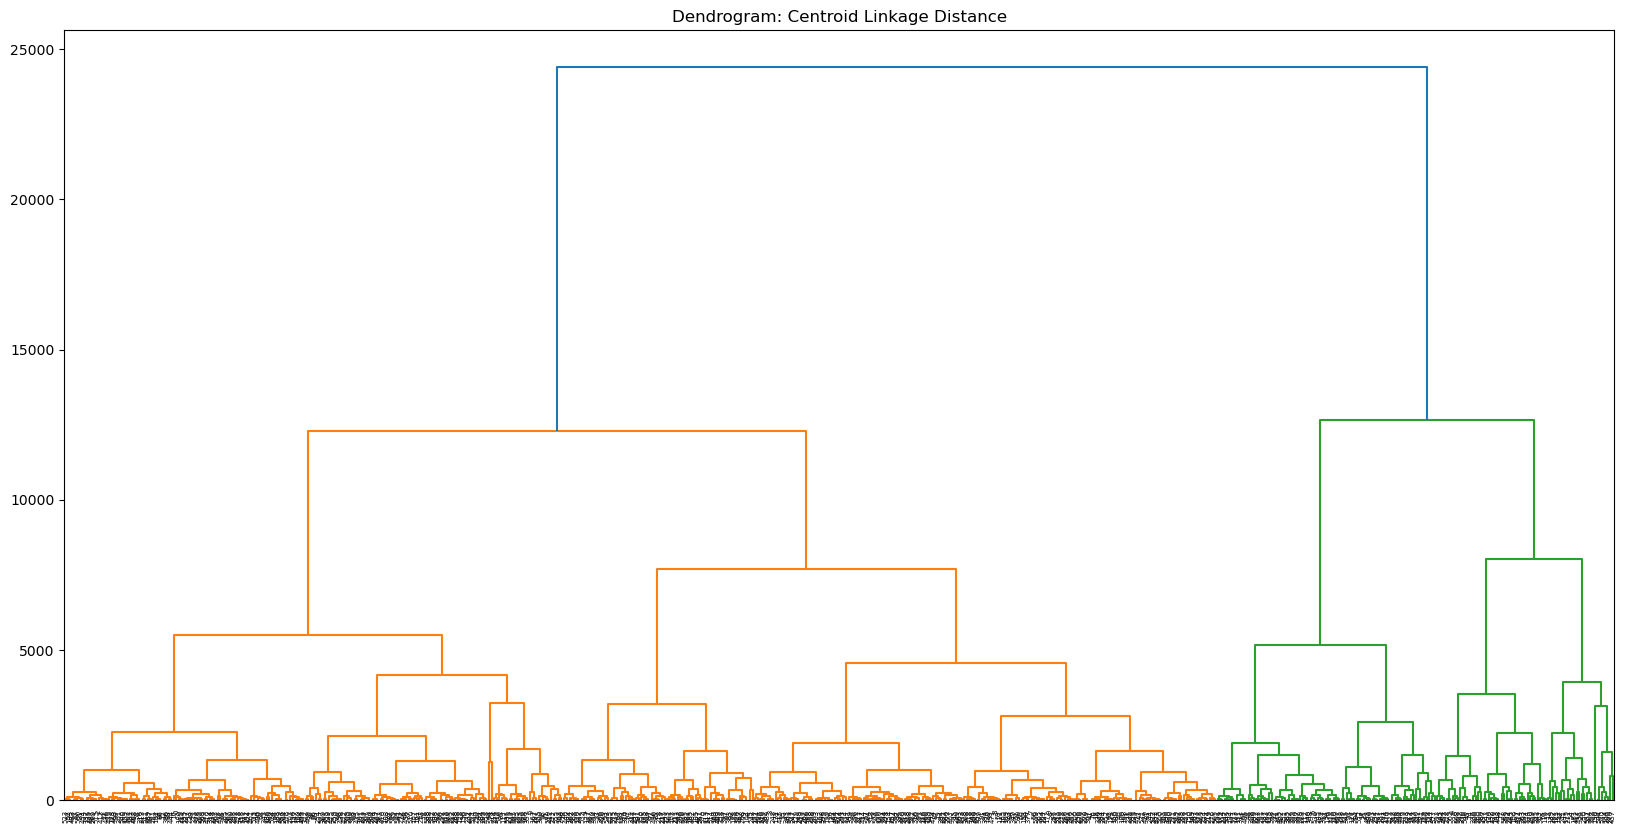

In [7]:
# Graph for Hierarchical Clustering - Centroid Linkage

plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbb1 = hc.dendrogram(clstr1)
plt.show()

In [8]:
# Maximum distance between merged clusters
max(clstr1[:,2])

24414.353627887212

In [9]:
# Default threshold for cluster formation: 70%
0.7*max(clstr1[:,2])

17090.04753952105

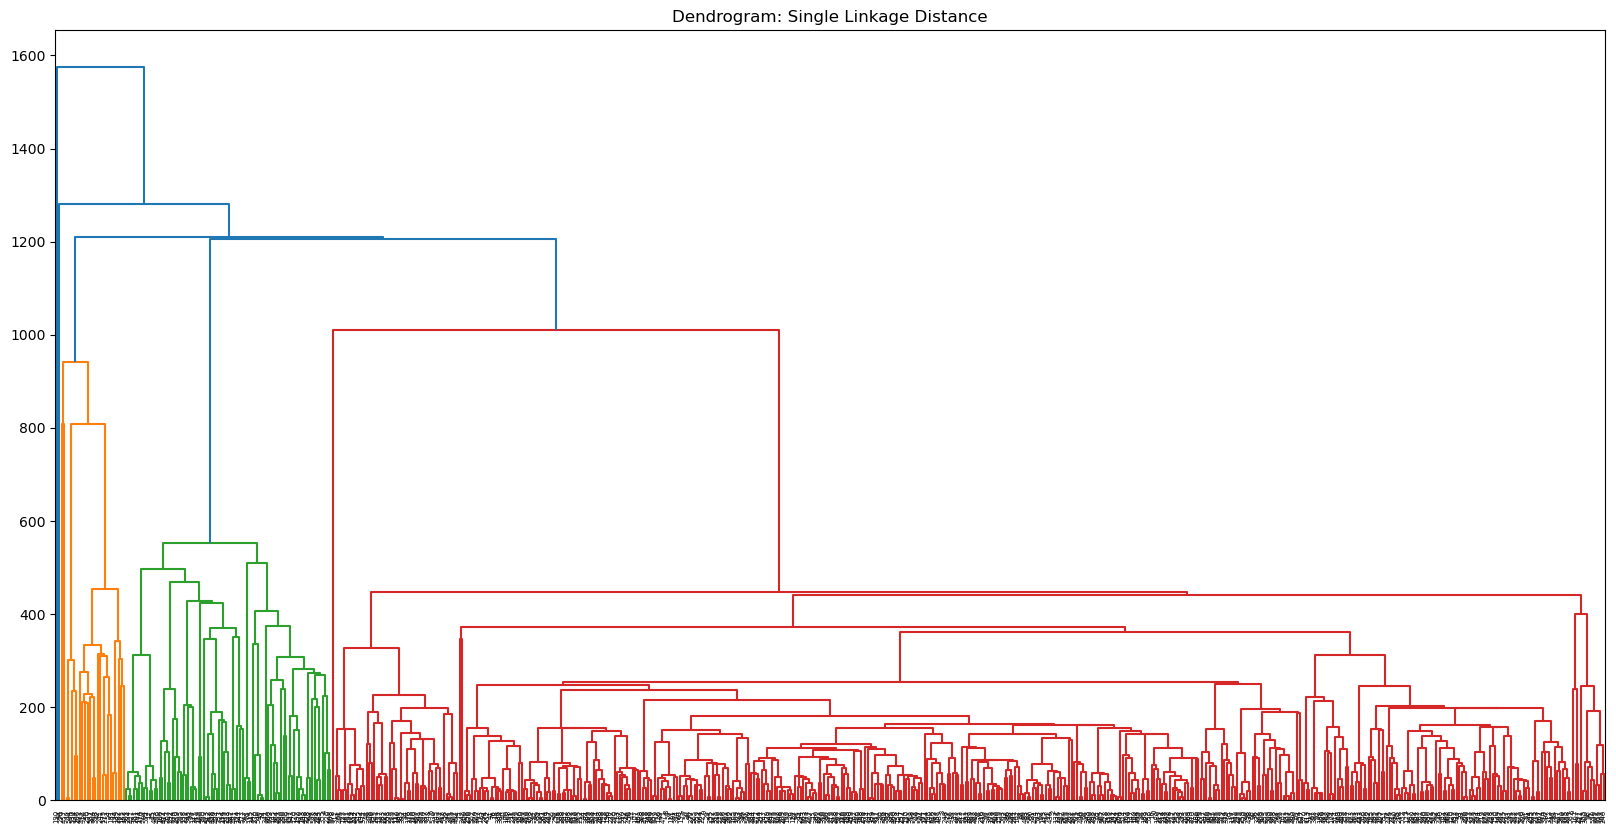

In [10]:
# Hierarchical Clustering: Single (Nearest) Linkage
clstr2 = hc.linkage(bb1, method='single', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Single Linkage Distance")
dgnbb2 = hc.dendrogram(clstr2)

In [11]:
# Maximum distance between merged clusters
max(clstr2[:,2])

1575.503808310218

In [12]:
# Default threshold for cluster formation: 70%
0.7*max(clstr2[:,2])

1102.8526658171525

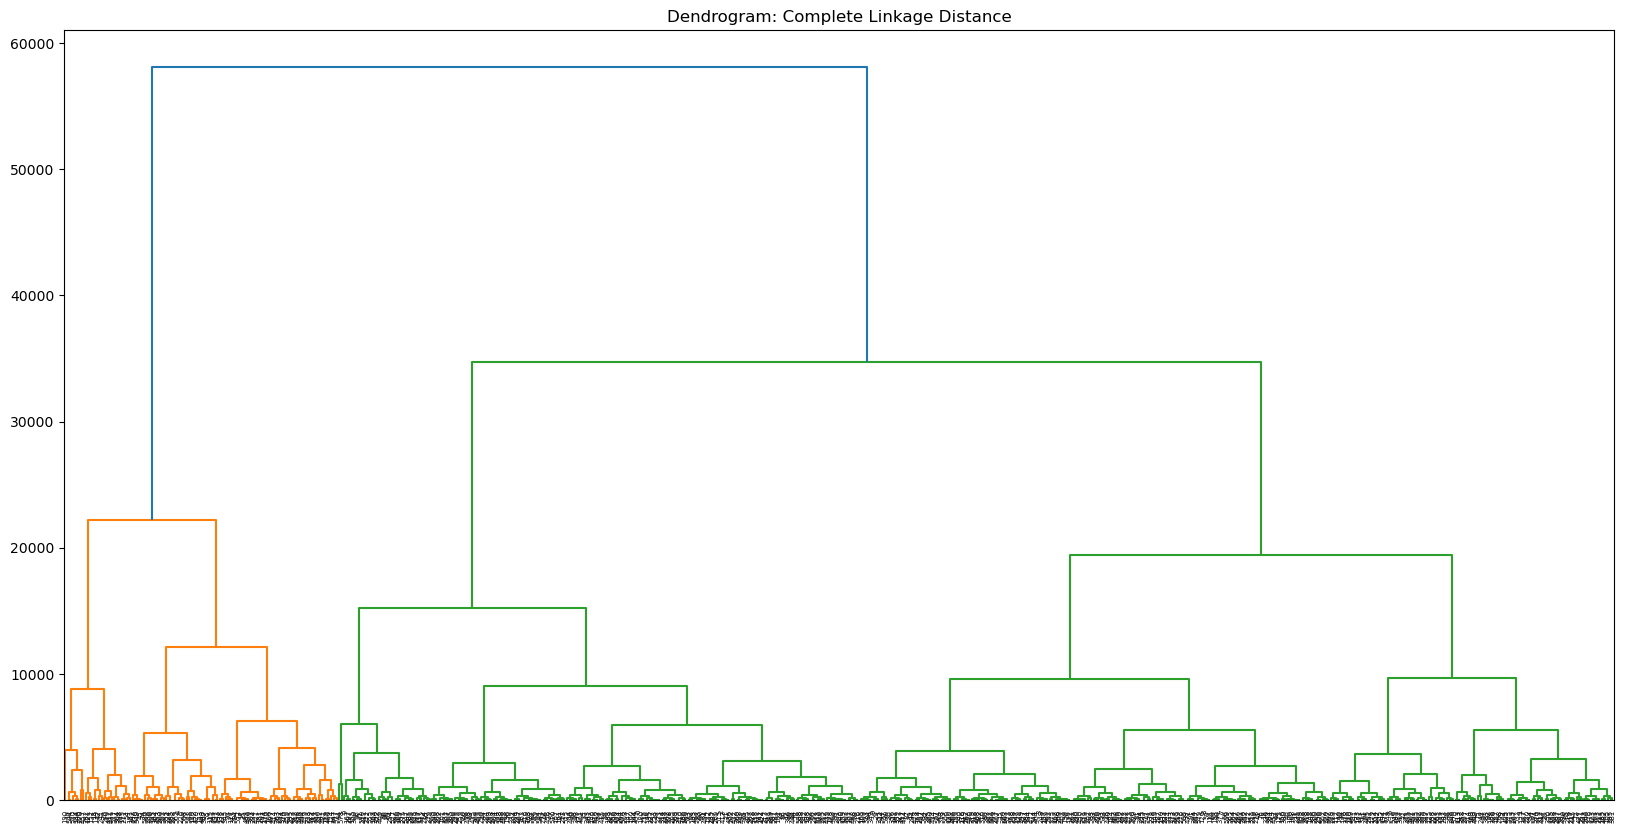

In [13]:
# Hierarchical Clustering: Complete Linkage
clstr3 = hc.linkage(bb1, method='complete', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Complete Linkage Distance")
dgnbb3 = hc.dendrogram(clstr3)

In [14]:
# Maximum distance between merged clusters
max(clstr3[:,2]) 

58115.908291035936

In [15]:
# Default threshold for cluster formation: 70%
0.7*max(clstr3[:,2])

40681.135803725156

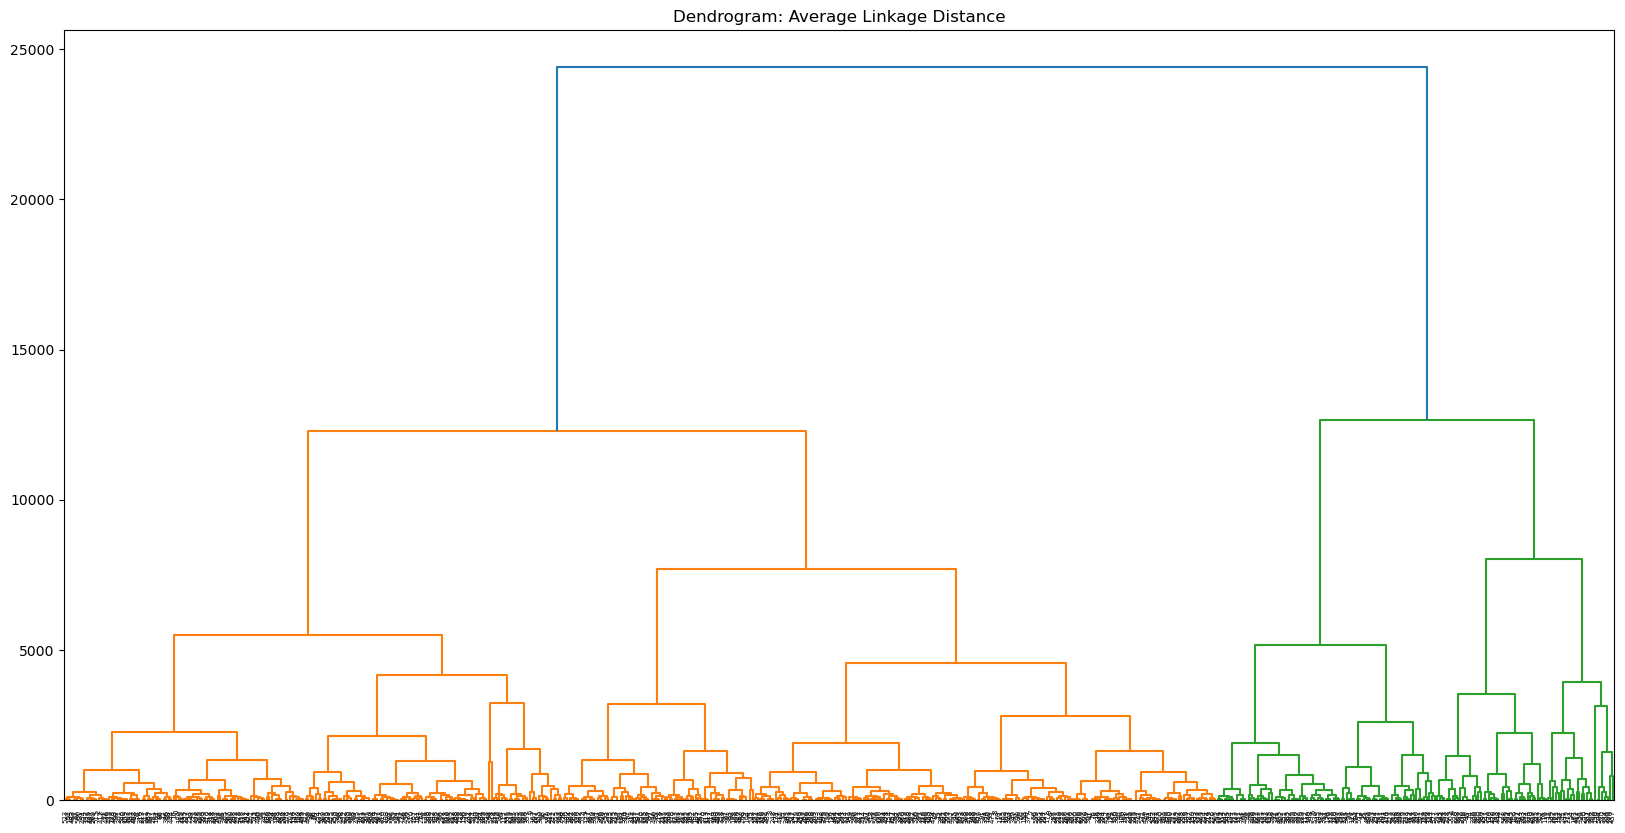

In [16]:
# Hierarchical Clustering: Average Linkage
clstr4 = hc.linkage(bb1, method='average', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Average Linkage Distance")
dgnbb4 = hc.dendrogram(clstr4)

In [17]:
# Maximum distance between merged clusters
max(clstr4[:,2]) 

24414.358430469827

In [18]:
# Default threshold for cluster formation: 70%
0.7*max(clstr4[:,2])

17090.05090132888

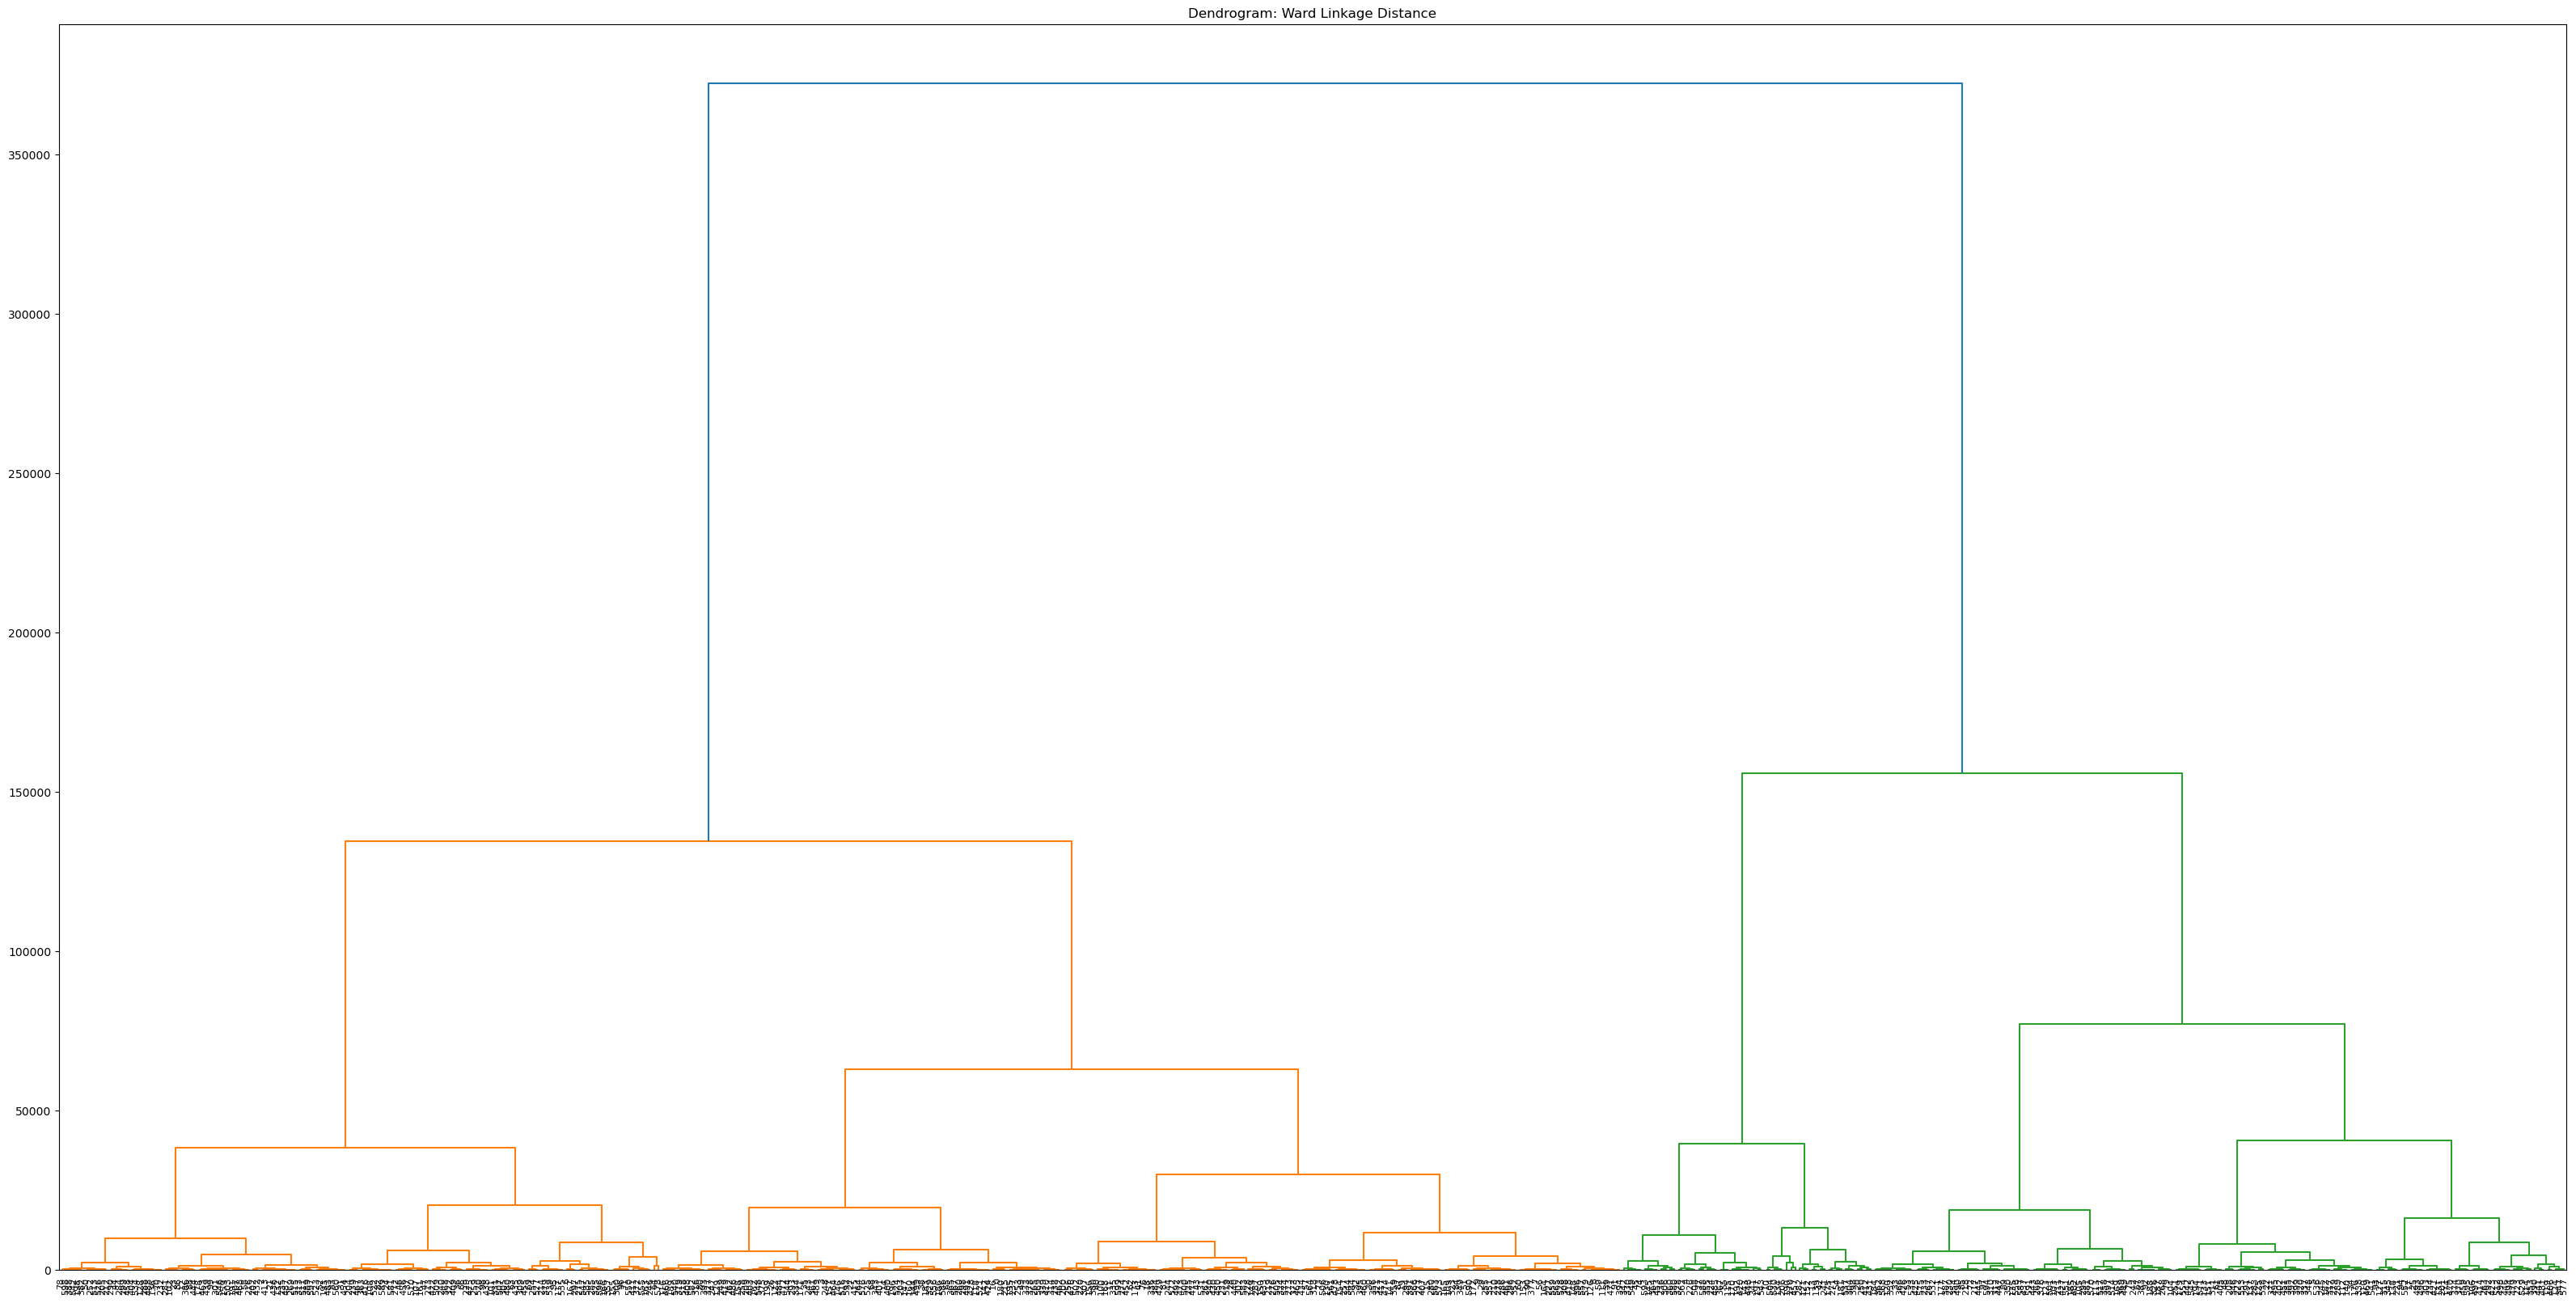

In [19]:
# Hierarchical Clustering: Ward Linkage
# Merge clusters based on the smallest increase in the Sum-of-Squares
clstr5 = hc.linkage(bb1, method='ward', metric="euclidean")
plt.figure(figsize=(40, 20))  
plt.title("Dendrogram: Ward Linkage Distance")
dgnbb5 = hc.dendrogram(clstr5, leaf_rotation=90., leaf_font_size=8.)

In [20]:
# Maximum distance between merged clusters
max(clstr5[:,2])

372294.11866367224

In [21]:
# Default threshold for cluster formation: 70%
0.7*max(clstr5[:,2])

260605.88306457055

In [22]:
# Use Centroid Linkage
# Display a truncated dendrogram with a horizontal line to separate the clusters
# p = 20

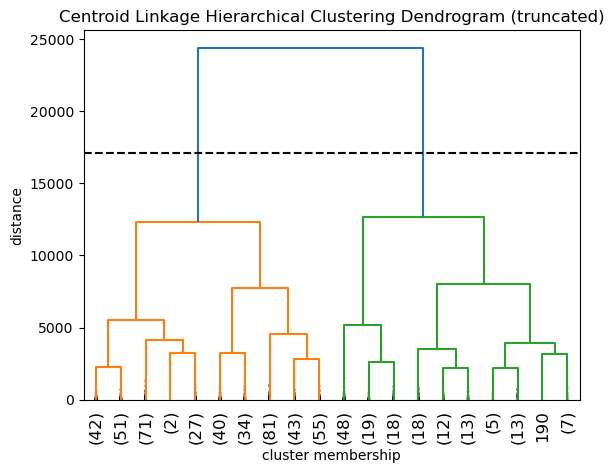

In [23]:
# For Centroid Linkage
plt.title('Centroid Linkage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(clstr1, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=17090, color='black', linestyle='--')
plt.show()

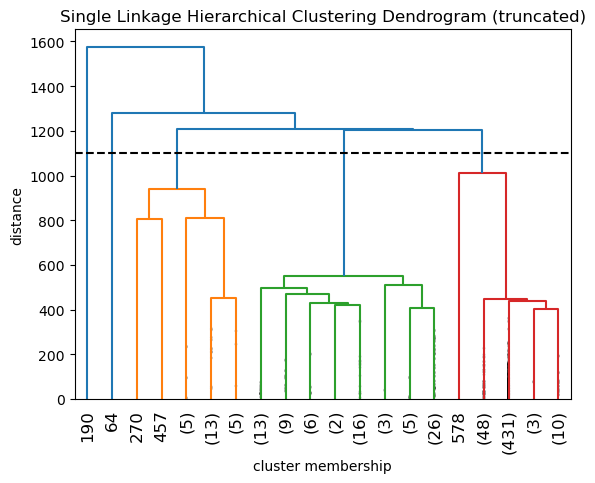

In [24]:
# For Single Linkage
plt.title('Single Linkage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(clstr2, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=1102, color='black', linestyle='--')
plt.show()

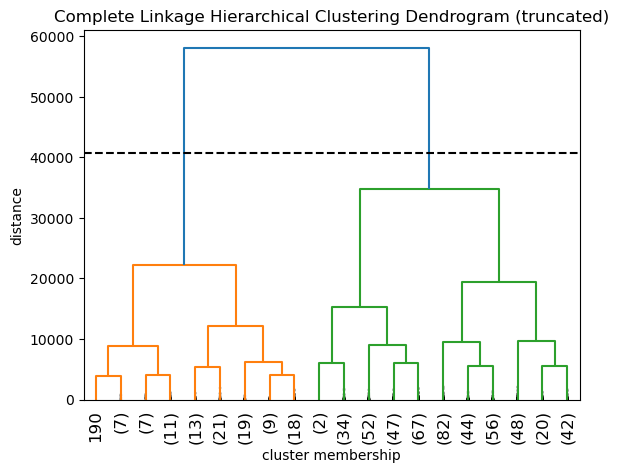

In [25]:
# For Complete Linkage
plt.title('Complete Linkage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(clstr3, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=40681, color='black', linestyle='--')
plt.show()

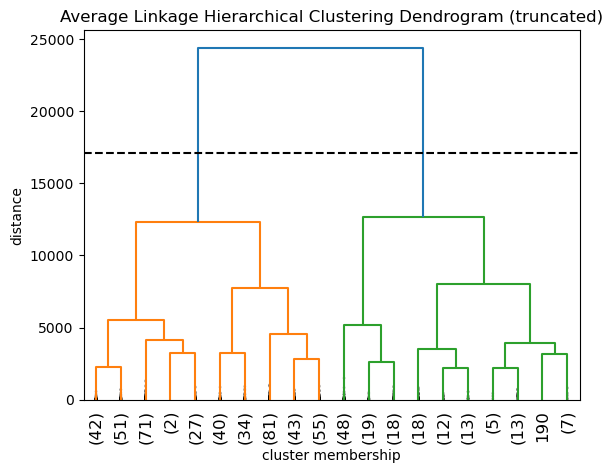

In [26]:
# For Average Linkage
plt.title('Average Linkage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(clstr4, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=17090, color='black', linestyle='--')
plt.show()

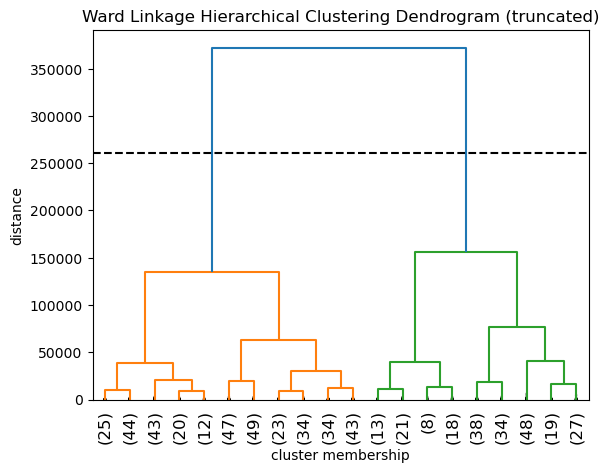

In [27]:
# For Ward Linkage
plt.title('Ward Linkage Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster membership')
plt.ylabel('distance')
hc.dendrogram(clstr5, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.axhline(y=260605, color='black', linestyle='--')
plt.show()

In [28]:
# Copying the dataset
bb_1 = bb1.copy()
bb_2 = bb1.copy()
bb_3 = bb1.copy()
bb_4 = bb1.copy()
bb_5 = bb1.copy()

### Centroid Linkage Insights 

In [29]:
# Cluster Membeship
maxdist = 17090
clusters1 = fcluster(clstr1, maxdist, criterion='distance')
clusters1

array([1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
len(clusters1)

600

In [31]:
# Adding cluster id to original dataset
bb_1['CLUSTER'] = clusters1.tolist()
bb_1


,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,1
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0,1
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,1
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0,2
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,1
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0,1
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0,1


In [32]:
# Get the averages of all the columns by cluster ID to try and identify cluster characteristics
# Review the cluster characteristics

bbAvg_1 = bb_1.groupby('CLUSTER', as_index=False).mean()
bbAvg_1

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,1,37.513453,0.508969,21257.682354,0.659193,0.988789,0.482063,0.616592,0.744395,0.356502,0.417040,0.446188,0.311659,0.145740,0.096413
1,2,56.532468,0.474026,45672.028571,0.662338,1.077922,0.525974,0.902597,0.798701,0.324675,0.571429,0.454545,0.220779,0.201299,0.123377


### Single Linkage Insights 

In [33]:
# Cluster Membership
maxdist = 1102
clusters2 = fcluster(clstr2, maxdist, criterion='distance')
clusters2

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,

In [34]:
len(clusters2)

600

In [35]:
# Adding cluster id to original dataset
bb_2['CLUSTER'] = clusters2.tolist()
bb_2


,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,3
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0,3
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,3
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0,3
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0,2
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,3
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0,3
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0,3


In [36]:
# Get the averages of all the columns by cluster ID to try and identify cluster characteristics
# Review the cluster characteristics

bbAvg_2 = bb_2.groupby('CLUSTER', as_index=False).mean()
bbAvg_2

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,1,63.640000,0.640000,57451.14800,0.480000,1.0000,0.440000,1.000000,0.840000,0.240000,0.840000,0.480000,0.280000,0.160000,0.08000
1,2,57.525000,0.450000,46525.44125,0.737500,1.0875,0.525000,1.000000,0.787500,0.350000,0.512500,0.400000,0.200000,0.287500,0.11250
2,3,38.855984,0.501014,22896.47144,0.657201,1.0000,0.488844,0.622718,0.748479,0.352941,0.427992,0.456389,0.302231,0.139959,0.10142
3,4,21.000000,0.000000,5014.21000,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
4,5,67.000000,1.000000,63130.10000,1.000000,2.0000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000


### Complete Linkage Insights 

In [37]:
# Cluster Membership
maxdist = 40681
clusters3 = fcluster(clstr3, maxdist, criterion='distance')
clusters3

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [38]:
len(clusters3)

600

In [39]:
# Adding cluster id to original dataset
bb_3['CLUSTER'] = clusters3.tolist()
bb_3


,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,2
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0,2
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,2
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0,2
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0,1
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,2
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0,2
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0,2


In [40]:
# Get the averages of all the columns by cluster ID to try and identify cluster characteristics
# Review the cluster characteristics

bbAvg_3 = bb_3.groupby('CLUSTER', as_index=False).mean()
bbAvg_3

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,1,59.056604,0.5,49258.906604,0.679245,1.075472,0.509434,1.000000,0.801887,0.320755,0.594340,0.415094,0.216981,0.254717,0.113208
1,2,38.819838,0.5,22860.272530,0.655870,0.997976,0.489879,0.623482,0.748988,0.354251,0.427126,0.455466,0.303644,0.139676,0.101215


### Average Linkage Insights 

In [41]:
# Cluster Membership
maxdist =  17090 
clusters4 = fcluster(clstr4, maxdist, criterion='distance')
clusters4

array([1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
len(clusters2)

600

In [43]:
# Adding cluster id to original dataset
bb_4['CLUSTER'] = clusters4.tolist()
bb_4


,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,1
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0,1
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,1
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0,2
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,1
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0,1
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0,1


In [44]:
# Get the averages of all the columns by cluster ID to try and identify cluster characteristics
# Review the cluster characteristics

bbAvg_4 = bb_4.groupby('CLUSTER', as_index=False).mean()
bbAvg_4

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,1,37.513453,0.508969,21257.682354,0.659193,0.988789,0.482063,0.616592,0.744395,0.356502,0.417040,0.446188,0.311659,0.145740,0.096413
1,2,56.532468,0.474026,45672.028571,0.662338,1.077922,0.525974,0.902597,0.798701,0.324675,0.571429,0.454545,0.220779,0.201299,0.123377


### Ward Linkage Insights 

In [45]:
# Cluster Membership
maxdist = 260605
clusters5 = fcluster(clstr5, maxdist, criterion='distance')
clusters5

array([1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,

In [46]:
len(clusters5)

600

In [47]:
# Adding cluster id to original dataset
bb_5['CLUSTER'] = clusters5.tolist()
bb_5


,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,1
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0,2
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,1
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0,2
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,1
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0,1
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0,1


In [48]:
# Get the averages of all the columns by cluster ID to try and identify cluster characteristics
# Review the cluster characteristics

bbAvg_5 = bb_5.groupby('CLUSTER', as_index=False).mean()
bbAvg_5

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,1,35.564171,0.5,19169.658904,0.671123,0.962567,0.457219,0.606952,0.745989,0.352941,0.382353,0.457219,0.296791,0.144385,0.101604
1,2,53.699115,0.5,41349.408407,0.641593,1.092920,0.553097,0.827434,0.778761,0.340708,0.579646,0.433628,0.274336,0.185841,0.106195


### Q3. Apply k-means clustering to the dataset. Try different values of k (4, 5, 6, 7, and 8 at least); make sure you include the number of clusters you decided to use with hierarchical clustering. Are clear clusters visible for any value of k? As before, how many clusters would you recommend, and why? What are some distinguishing characteristics of each cluster? How different are these results from those with hierarchical clustering? Which seems preferable in this case? Explain

In [49]:
# Importing necessary libraries
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import normalize

### K-Means with 2 Clusters

In [50]:
# Copying the dataset
k1 = bb1.copy()
k1

,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0


In [51]:
# Performing K-Means Clustering
clstr2 = km(n_clusters=2, random_state=0) 
clstr2 = clstr2.fit(k1)
clstr2

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [52]:
# Cluster Centers

cluster_c = clstr2.cluster_centers_
cluster_c

array([[3.64679803e+01, 5.14778325e-01, 2.00547562e+04, 6.65024631e-01,
        9.67980296e-01, 4.65517241e-01, 6.10837438e-01, 7.46305419e-01,
        3.57142857e-01, 3.96551724e-01, 4.50738916e-01, 3.05418719e-01,
        1.40394089e-01, 1.03448276e-01],
       [5.47989691e+01, 4.69072165e-01, 4.31556067e+04, 6.49484536e-01,
        1.10309278e+00, 5.51546392e-01, 8.55670103e-01, 7.83505155e-01,
        3.29896907e-01, 5.82474227e-01, 4.43298969e-01, 2.52577320e-01,
        2.01030928e-01, 1.03092784e-01]])

In [53]:
# Assign Cluster Membership Labels

clusters2 = clstr2.labels_
clusters2

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [54]:
# Add to the Dataframe

nbb2 = bb1.copy()
nbb2['CLUSTER'] = clusters2.tolist()
nbb2

,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0
1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0,0
2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,0
3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0,0
4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0,1
596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0,0
597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0,0
598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0,0


In [55]:
# Check cluster sizes

nbb2['CLUSTER'].value_counts()

0    406
1    194
Name: CLUSTER, dtype: int64

In [56]:
# Get averages by cluster to see how the clusters are different

nbb2Avg = nbb2.groupby('CLUSTER', as_index=False).mean()
nbb2Avg

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,36.467980,0.514778,20054.756232,0.665025,0.967980,0.465517,0.610837,0.746305,0.357143,0.396552,0.450739,0.305419,0.140394,0.103448
1,1,54.798969,0.469072,43155.606701,0.649485,1.103093,0.551546,0.855670,0.783505,0.329897,0.582474,0.443299,0.252577,0.201031,0.103093


### K-Means with 3 Clusters

In [57]:
# Performing K-Means and deriving insights by generating various information regarding clusters.
clstr3 = km(n_clusters=3, random_state=0) 
clstr3.fit(bb1)
print(clstr3.cluster_centers_)
clusters3 = clstr3.labels_
print(clusters3)

nbb3 = bb1.copy()
nbb3['CLUSTER'] = clusters3.tolist()
print(nbb3['CLUSTER'].value_counts())
nbb3Avg = nbb3.groupby('CLUSTER', as_index=False).mean()
nbb3Avg

[[3.23699634e+01 4.87179487e-01 1.64878906e+04 6.81318681e-01
  9.96336996e-01 4.32234432e-01 6.08058608e-01 7.50915751e-01
  3.44322344e-01 3.77289377e-01 4.76190476e-01 2.96703297e-01
  1.28205128e-01 9.89010989e-02]
 [5.90566038e+01 5.00000000e-01 4.92589066e+04 6.79245283e-01
  1.07547170e+00 5.09433962e-01 1.00000000e+00 8.01886792e-01
  3.20754717e-01 5.94339623e-01 4.15094340e-01 2.16981132e-01
  2.54716981e-01 1.13207547e-01]
 [4.67873303e+01 5.15837104e-01 3.07320385e+04 6.24434389e-01
  1.00000000e+00 5.61085973e-01 6.42533937e-01 7.46606335e-01
  3.66515837e-01 4.88687783e-01 4.29864253e-01 3.12217195e-01
  1.53846154e-01 1.04072398e-01]]
[0 2 0 0 1 2 0 2 2 2 1 2 0 1 0 0 0 1 2 0 1 0 2 0 0 1 0 0 2 2 0 0 0 2 2 0 0
 0 0 2 2 2 1 2 0 1 0 0 2 0 0 2 0 2 1 1 2 0 0 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0
 1 2 2 1 0 2 0 2 0 0 2 2 0 0 0 2 2 2 2 1 1 0 0 2 0 0 2 0 0 2 2 2 1 0 0 2 2
 2 2 2 1 1 0 0 0 1 2 1 0 2 1 2 2 1 0 0 0 1 0 2 1 2 0 2 1 1 2 0 0 1 0 1 0 0
 2 2 2 2 1 2 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,32.369963,0.487179,16487.890586,0.681319,0.996337,0.432234,0.608059,0.750916,0.344322,0.377289,0.476190,0.296703,0.128205,0.098901
1,1,59.056604,0.500000,49258.906604,0.679245,1.075472,0.509434,1.000000,0.801887,0.320755,0.594340,0.415094,0.216981,0.254717,0.113208
2,2,46.787330,0.515837,30732.038462,0.624434,1.000000,0.561086,0.642534,0.746606,0.366516,0.488688,0.429864,0.312217,0.153846,0.104072


### K-Means with 4 Clusters 

In [58]:
# Performing K-Means and deriving insights by generating various information regarding clusters.
clstr4 = km(n_clusters=4, random_state=0) 
clstr4.fit(bb1)
print(clstr4.cluster_centers_)
clusters4 = clstr4.labels_
print(clusters4)

nbb4 = bb1.copy()
nbb4['CLUSTER'] = clusters4.tolist()
print(nbb4['CLUSTER'].value_counts())
nbb4Avg = nbb4.groupby('CLUSTER', as_index=False).mean()
nbb4Avg

[[6.11891892e+01 5.00000000e-01 5.21703959e+04 6.62162162e-01
  1.13513514e+00 5.40540541e-01 1.00000000e+00 7.70270270e-01
  3.10810811e-01 7.16216216e-01 3.91891892e-01 1.89189189e-01
  2.70270270e-01 1.48648649e-01]
 [2.94175258e+01 4.89690722e-01 1.43127481e+04 6.59793814e-01
  1.00000000e+00 4.43298969e-01 6.13402062e-01 7.68041237e-01
  3.40206186e-01 3.55670103e-01 5.25773196e-01 2.47422680e-01
  1.28865979e-01 9.79381443e-02]
 [4.28333333e+01 5.33333333e-01 2.52508014e+04 6.76190476e-01
  9.33333333e-01 4.85714286e-01 6.04761905e-01 7.28571429e-01
  3.66666667e-01 4.28571429e-01 3.76190476e-01 3.61904762e-01
  1.52380952e-01 1.09523810e-01]
 [5.08770492e+01 4.59016393e-01 3.74956393e+04 6.31147541e-01
  1.09016393e+00 5.57377049e-01 7.70491803e-01 7.86885246e-01
  3.52459016e-01 5.08196721e-01 4.83606557e-01 2.86885246e-01
  1.55737705e-01 7.37704918e-02]]
[1 2 1 2 0 3 1 2 2 2 0 2 1 0 1 2 1 3 2 2 0 1 3 1 1 3 2 2 2 2 2 1 2 2 3 2 1
 1 1 2 2 2 0 2 1 0 1 1 3 1 1 2 1 2 0 0 2 2 1 2 2

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,61.189189,0.500000,52170.395946,0.662162,1.135135,0.540541,1.000000,0.770270,0.310811,0.716216,0.391892,0.189189,0.270270,0.148649
1,1,29.417526,0.489691,14312.748093,0.659794,1.000000,0.443299,0.613402,0.768041,0.340206,0.355670,0.525773,0.247423,0.128866,0.097938
2,2,42.833333,0.533333,25250.801429,0.676190,0.933333,0.485714,0.604762,0.728571,0.366667,0.428571,0.376190,0.361905,0.152381,0.109524
3,3,50.877049,0.459016,37495.639344,0.631148,1.090164,0.557377,0.770492,0.786885,0.352459,0.508197,0.483607,0.286885,0.155738,0.073770


### K-Means with 5 Clusters 

In [59]:
# Performing K-Means and deriving insights by generating various information regarding clusters.
clstr5 = km(n_clusters=5, random_state=0) 
clstr5.fit(bb1)
print(clstr5.cluster_centers_)
clusters5 = clstr5.labels_
print(clusters5)

nbb5 = bb1.copy()
nbb5['CLUSTER'] = clusters5.tolist()
print(nbb5['CLUSTER'].value_counts())
nbb5Avg = nbb5.groupby('CLUSTER', as_index=False).mean()
nbb5Avg

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[3.96234568e+01 4.93827160e-01 2.18347864e+04 7.16049383e-01
  9.62962963e-01 4.38271605e-01 5.67901235e-01 7.03703704e-01
  3.82716049e-01 4.44444444e-01 4.13580247e-01 3.27160494e-01
  1.54320988e-01 1.04938272e-01]
 [5.30108696e+01 4.45652174e-01 4.02533370e+04 6.63043478e-01
  1.02173913e+00 5.32608696e-01 8.26086957e-01 7.93478261e-01
  3.15217391e-01 4.67391304e-01 4.89130435e-01 2.28260870e-01
  1.73913043e-01 1.08695652e-01]
 [6.17968750e+01 5.15625000e-01 5.31415531e+04 6.56250000e-01
  1.17187500e+00 5.31250000e-01 1.00000000e+00 7.96875000e-01
  3.28125000e-01 7.34375000e-01 4.06250000e-01 2.03125000e-01
  2.50000000e-01 1.40625000e-01]
 [4.54960630e+01 5.74803150e-01 3.00625843e+04 6.14173228e-01
  1.01574803e+00 5.66929134e-01 6.61417323e-01 7.55905512e-01
  3.77952756e-01 5.03937008e-01 3.93700787e-01 3.62204724e-01
  1.57480315e-01 8.66141732e-02]
 [2.84387097e+01 4.70967742e-01 1.32572176e+04 6.38709677e-01
  9.87096774e-01 4.51612903e-01 6.32258065e-01 7.80645161e-01


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,39.623457,0.493827,21834.786420,0.716049,0.962963,0.438272,0.567901,0.703704,0.382716,0.444444,0.413580,0.327160,0.154321,0.104938
1,1,53.010870,0.445652,40253.336957,0.663043,1.021739,0.532609,0.826087,0.793478,0.315217,0.467391,0.489130,0.228261,0.173913,0.108696
2,2,61.796875,0.515625,53141.553125,0.656250,1.171875,0.531250,1.000000,0.796875,0.328125,0.734375,0.406250,0.203125,0.250000,0.140625
3,3,45.496063,0.574803,30062.584252,0.614173,1.015748,0.566929,0.661417,0.755906,0.377953,0.503937,0.393701,0.362205,0.157480,0.086614
4,4,28.438710,0.470968,13257.217613,0.638710,0.987097,0.451613,0.632258,0.780645,0.316129,0.309677,0.522581,0.258065,0.122581,0.096774


### K-Means with 6 Clusters 

In [60]:
# Performing K-Means and deriving insights by generating various information regarding clusters.
clstr6 = km(n_clusters=6, random_state=0) 
clstr6.fit(bb1)
print(clstr6.cluster_centers_)
clusters6 = clstr6.labels_
print(clusters6)
nbb6 = bb1.copy()
nbb6['CLUSTER'] = clusters6.tolist()
print(nbb6['CLUSTER'].value_counts())
nbb6Avg = nbb6.groupby('CLUSTER', as_index=False).mean()
nbb6Avg

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[4.49621212e+01 5.75757576e-01 2.74045364e+04 6.28787879e-01
  9.01515152e-01 5.30303030e-01 6.13636364e-01 7.34848485e-01
  3.86363636e-01 4.39393939e-01 4.01515152e-01 3.25757576e-01
  1.59090909e-01 1.13636364e-01]
 [6.26444444e+01 6.00000000e-01 5.51058200e+04 5.55555556e-01
  1.17777778e+00 5.11111111e-01 1.00000000e+00 8.00000000e-01
  3.11111111e-01 8.22222222e-01 3.77777778e-01 2.44444444e-01
  2.22222222e-01 1.55555556e-01]
 [3.71208054e+01 4.89932886e-01 1.99585671e+04 7.24832215e-01
  9.93288591e-01 4.49664430e-01 5.90604027e-01 7.24832215e-01
  3.62416107e-01 4.63087248e-01 4.29530201e-01 3.48993289e-01
  1.27516779e-01 9.39597315e-02]
 [4.96704545e+01 4.31818182e-01 3.58039045e+04 6.13636364e-01
  1.13636364e+00 6.02272727e-01 6.81818182e-01 7.61363636e-01
  3.40909091e-01 5.68181818e-01 4.77272727e-01 2.95454545e-01
  1.36363636e-01 9.09090909e-02]
 [2.67200000e+01 4.80000000e-01 1.24080458e+04 6.32000000e-01
  1.00800000e+00 4.16000000e-01 6.32000000e-01 7.84000000e-01


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,44.962121,0.575758,27404.536364,0.628788,0.901515,0.530303,0.613636,0.734848,0.386364,0.439394,0.401515,0.325758,0.159091,0.113636
1,1,62.644444,0.600000,55105.820000,0.555556,1.177778,0.511111,1.000000,0.800000,0.311111,0.822222,0.377778,0.244444,0.222222,0.155556
2,2,37.120805,0.489933,19958.567114,0.724832,0.993289,0.449664,0.590604,0.724832,0.362416,0.463087,0.429530,0.348993,0.127517,0.093960
3,3,49.670455,0.431818,35803.904545,0.613636,1.136364,0.602273,0.681818,0.761364,0.340909,0.568182,0.477273,0.295455,0.136364,0.090909
4,4,26.720000,0.480000,12408.045840,0.632000,1.008000,0.416000,0.632000,0.784000,0.320000,0.272000,0.528000,0.232000,0.136000,0.104000
5,5,56.409836,0.426230,44945.609836,0.770492,1.000000,0.508197,1.000000,0.803279,0.327869,0.426230,0.442623,0.196721,0.278689,0.081967


### K-Means with 7 Clusters 

In [61]:
clstr7 = km(n_clusters=7, random_state=0) 
clstr7.fit(bb1)
print(clstr7.cluster_centers_)
clusters7 = clstr7.labels_
print(clusters7)
nbb7 = bb1.copy()
nbb7['CLUSTER'] = clusters7.tolist()
print(nbb7['CLUSTER'].value_counts())
nbb7Avg = nbb7.groupby('CLUSTER', as_index=False).mean()
nbb7Avg

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[2.49125000e+01 4.62500000e-01 1.09650541e+04 5.75000000e-01
  1.06250000e+00 3.75000000e-01 6.50000000e-01 8.12500000e-01
  3.12500000e-01 2.62500000e-01 4.87500000e-01 2.50000000e-01
  1.50000000e-01 1.12500000e-01]
 [5.62711864e+01 4.23728814e-01 4.47778051e+04 7.62711864e-01
  9.83050847e-01 5.08474576e-01 1.00000000e+00 7.96610169e-01
  3.22033898e-01 4.23728814e-01 4.40677966e-01 2.03389831e-01
  2.71186441e-01 8.47457627e-02]
 [4.46633663e+01 5.94059406e-01 2.90635970e+04 6.53465347e-01
  1.01980198e+00 5.84158416e-01 6.73267327e-01 7.52475248e-01
  3.86138614e-01 4.65346535e-01 4.05940594e-01 3.36633663e-01
  1.48514851e-01 1.08910891e-01]
 [6.25531915e+01 5.95744681e-01 5.48841191e+04 5.74468085e-01
  1.19148936e+00 5.10638298e-01 1.00000000e+00 8.08510638e-01
  3.19148936e-01 8.08510638e-01 3.82978723e-01 2.34042553e-01
  2.34042553e-01 1.48936170e-01]
 [3.25789474e+01 5.08771930e-01 1.66620070e+04 7.19298246e-01
  9.56140351e-01 4.91228070e-01 5.87719298e-01 7.36842105e-01


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,24.912500,0.462500,10965.054125,0.575000,1.062500,0.375000,0.650000,0.812500,0.312500,0.262500,0.487500,0.250000,0.150000,0.112500
1,1,56.271186,0.423729,44777.805085,0.762712,0.983051,0.508475,1.000000,0.796610,0.322034,0.423729,0.440678,0.203390,0.271186,0.084746
2,2,44.663366,0.594059,29063.597030,0.653465,1.019802,0.584158,0.673267,0.752475,0.386139,0.465347,0.405941,0.336634,0.148515,0.108911
3,3,62.553191,0.595745,54884.119149,0.574468,1.191489,0.510638,1.000000,0.808511,0.319149,0.808511,0.382979,0.234043,0.234043,0.148936
4,4,32.578947,0.508772,16662.007018,0.719298,0.956140,0.491228,0.587719,0.736842,0.359649,0.421053,0.552632,0.245614,0.114035,0.087719
5,5,41.626016,0.471545,22889.682927,0.707317,0.934959,0.447154,0.577236,0.699187,0.365854,0.414634,0.373984,0.365854,0.154472,0.105691
6,6,50.513158,0.447368,36387.463158,0.565789,1.065789,0.552632,0.657895,0.776316,0.328947,0.578947,0.473684,0.302632,0.131579,0.092105


### K-Means with 8 Clusters 

In [62]:
# Performing K-Means and deriving insights by generating various information regarding clusters.
clstr8 = km(n_clusters=8, random_state=0) 
clstr8.fit(bb1)
print(clstr8.cluster_centers_)
clusters8 = clstr8.labels_
print(clusters8)
nbb8 = bb1.copy()
nbb8['CLUSTER'] = clusters8.tolist()
print(nbb8['CLUSTER'].value_counts())
nbb8Avg = nbb8.groupby('CLUSTER', as_index=False).mean()
nbb8Avg

/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[4.46200000e+01 6.00000000e-01 2.90275340e+04 6.50000000e-01
  1.02000000e+00 5.80000000e-01 6.70000000e-01 7.50000000e-01
  3.80000000e-01 4.60000000e-01 4.10000000e-01 3.40000000e-01
  1.40000000e-01 1.10000000e-01]
 [2.49125000e+01 4.62500000e-01 1.09650541e+04 5.75000000e-01
  1.06250000e+00 3.75000000e-01 6.50000000e-01 8.12500000e-01
  3.12500000e-01 2.62500000e-01 4.87500000e-01 2.50000000e-01
  1.50000000e-01 1.12500000e-01]
 [5.99767442e+01 4.18604651e-01 4.96282605e+04 7.67441860e-01
  1.16279070e+00 5.81395349e-01 1.00000000e+00 7.67441860e-01
  3.95348837e-01 6.27906977e-01 3.72093023e-01 1.39534884e-01
  3.25581395e-01 1.62790698e-01]
 [4.16260163e+01 4.71544715e-01 2.28896829e+04 7.07317073e-01
  9.34959350e-01 4.47154472e-01 5.77235772e-01 6.99186992e-01
  3.65853659e-01 4.14634146e-01 3.73983740e-01 3.65853659e-01
  1.54471545e-01 1.05691057e-01]
 [5.48000000e+01 4.50000000e-01 4.26744950e+04 7.00000000e-01
  9.75000000e-01 5.00000000e-01 9.75000000e-01 8.00000000e-01


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,innercity,town,rural,suburban
0,0,44.620000,0.600000,29027.534000,0.650000,1.020000,0.580000,0.670000,0.750000,0.380000,0.460000,0.410000,0.340000,0.140000,0.110000
1,1,24.912500,0.462500,10965.054125,0.575000,1.062500,0.375000,0.650000,0.812500,0.312500,0.262500,0.487500,0.250000,0.150000,0.112500
2,2,59.976744,0.418605,49628.260465,0.767442,1.162791,0.581395,1.000000,0.767442,0.395349,0.627907,0.372093,0.139535,0.325581,0.162791
3,3,41.626016,0.471545,22889.682927,0.707317,0.934959,0.447154,0.577236,0.699187,0.365854,0.414634,0.373984,0.365854,0.154472,0.105691
4,4,54.800000,0.450000,42674.495000,0.700000,0.975000,0.500000,0.975000,0.800000,0.300000,0.375000,0.450000,0.250000,0.250000,0.050000
5,5,32.578947,0.508772,16662.007018,0.719298,0.956140,0.491228,0.587719,0.736842,0.359649,0.421053,0.552632,0.245614,0.114035,0.087719
6,6,63.769231,0.653846,57669.569231,0.500000,1.038462,0.461538,1.000000,0.846154,0.230769,0.846154,0.461538,0.269231,0.153846,0.115385
7,7,50.256757,0.459459,36204.829730,0.567568,1.081081,0.540541,0.662162,0.783784,0.337838,0.594595,0.459459,0.310811,0.135135,0.094595


/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ramyavissapragada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

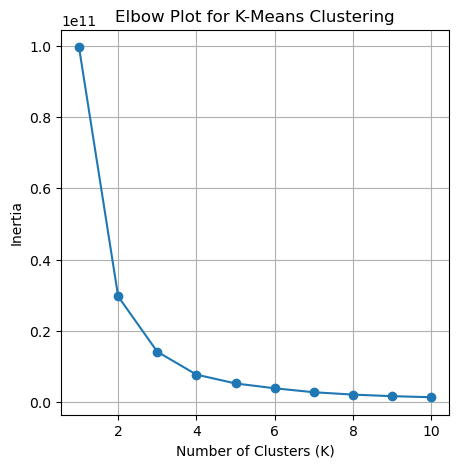

In [65]:
# Verifying optimum number of clusters using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics

inertia_values = []

# Range of K values being considered
k_values = range(1, 11)

# Looping through various number of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(k1)
    inertia_values.append(kmeans.inertia_)

# Creating the elbow plot
plt.figure(figsize=(5, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [64]:
# Question 4 answered in report (word document)